# Add watermark to your image(s)

To run from terminal directly, scroll down to the bottom of this page and run as instructed

In [1]:
import numpy as np
import cv2

import glob2 as glob
import os

import matplotlib.pyplot as plt

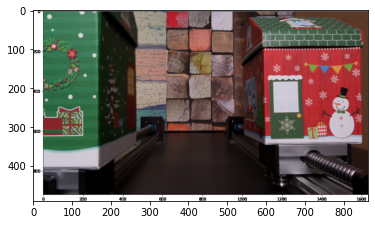

In [2]:
# Load the image to be watermarked
img = cv2.imread("data/images/all_in_focus_image.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

(726, 1468, 3)


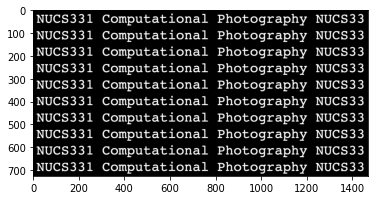

In [3]:
# Load the watermark
waterimg = cv2.imread("data/watermark/NUCS331 Watermark.png")
waterimg = cv2.cvtColor(waterimg, cv2.COLOR_BGR2RGB)

plt.imshow(waterimg)
print(waterimg.shape)

New size of watermark:  (491, 863, 3)


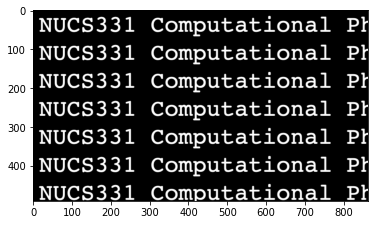

In [4]:
# First make the watermark image the same size as source image
waterimgRes = np.zeros(img.shape)

# First, in height 0-dimension:
if (img.shape[0] > waterimg.shape[0]):
    bottom_pad = img.shape[0] - waterimg.shape[0]
    waterimgRes = cv2.copyMakeBorder(waterimg, 0, bottom_pad, 0, 0, cv.BORDER_REPLICATE)
else:
    waterimgRes = waterimg[:img.shape[0],:,:]

# Now, in width 0-dimension:
if (img.shape[1] > waterimgRes.shape[1]):
    right_pad = img.shape[1] - waterimgRes.shape[1]
    waterimgRes = cv2.copyMakeBorder(waterimgRes, 0, 0, 0, right_pad, cv.BORDER_REPLICATE)
else:
    waterimgRes = waterimgRes[:,:img.shape[1],:]
    
print("New size of watermark: ", waterimgRes.shape)
plt.imshow(waterimgRes)

True

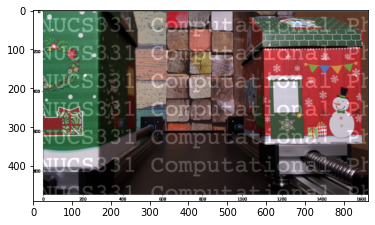

In [5]:
# Blend both the images
img_blend = cv2.addWeighted(img, 1.0, waterimgRes, 0.2, 0.0)
plt.imshow(img_blend)

img_blend = cv2.cvtColor(img_blend, cv2.COLOR_RGB2BGR)

str_imgname = "img1.png"
str_out = "output/"+str_imgname  
cv2.imwrite(str_out, img_blend)

In [6]:
# Make a function out of this:

def AddWatermark(str_imgname, str_watermarkname, str_out, alpha1=1.0, alpha2=0.2):
    # Load the image to be watermarked
    img = cv2.imread(str_imgname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Load the watermark
    waterimg = cv2.imread(str_watermarkname)
    waterimg = cv2.cvtColor(waterimg, cv2.COLOR_BGR2RGB)
    
    waterimgRes = MirrorResize(img, waterimg)
    
    # Blend both the images
    img_blend = cv2.addWeighted(img, alpha1, waterimgRes, alpha2, 0.0)
    
    img_blend_write = cv2.cvtColor(img_blend, cv2.COLOR_RGB2BGR)
    str_out = "output/"+str_out  
    cv2.imwrite(str_out, img_blend_write)
    
    return img_blend
    
    
def MirrorResize(img, waterimg):
    # First make the watermark image the same size as source image
    waterimgRes = np.zeros(img.shape)

    # First, in height 0-dimension:
    if (img.shape[0] > waterimg.shape[0]):
        bottom_pad = img.shape[0] - waterimg.shape[0]
        waterimgRes = cv2.copyMakeBorder(waterimg, 0, bottom_pad, 0, 0, cv.BORDER_REPLICATE)
    else:
        waterimgRes = waterimg[:img.shape[0],:,:]

    # Now, in width 0-dimension:
    if (img.shape[1] > waterimgRes.shape[1]):
        right_pad = img.shape[1] - waterimgRes.shape[1]
        waterimgRes = cv2.copyMakeBorder(waterimgRes, 0, 0, 0, right_pad, cv.BORDER_REPLICATE)
    else:
        waterimgRes = waterimgRes[:,:img.shape[1],:]
        
    return waterimgRes

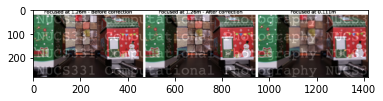

In [7]:
## Test out the above functions

img_watermarked = AddWatermark("data/images/after_magnification_correction.png", "data/watermark/NUCS331 Watermark.png", "after_magnification_correction.png")
plt.imshow(img_watermarked)

## Copied the functions to src/code.py

Test them again so that we can run directly from terminal next time

In [8]:
import src.code as code
# Information on autoreload
%load_ext autoreload
%autoreload 2

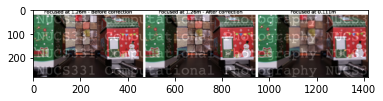

In [9]:
# Run the command for a given image and a watermark
# optionally also specify alpha1 and alpha2

img_watermarked = code.AddWatermark("data/images/after_magnification_correction.png", "data/watermark/NUCS331 Watermark.png")
plt.imshow(img_watermarked)

In [10]:
# Run the command for all the images in a given folder and a watermark
# optionally also specify alpha1 and alpha2

code.AddWatermarkFolder("data/images/", "data/watermark/NUCS331 Watermark.png")

data/images/after_magnification_correction.png
data/images/all_in_focus_image.png
data/images/after_average_mask_square.png
data/images/after_average_mask_disk.png


---------

# To run form terminal:

1. Go to the project folder ("WaterMark python") -> Open terminal
2. Enter this command:

python3 src/code.py AddWatermarkFolder "data/images/" "data/watermark/NUCS331 Watermark.png"

*You can replace your image folder ("data/images/") and watermark image ("data/watermark/NUCS331 Watermark.png") as per your choice*

3. Check your output in the output folder in the project directory

---------